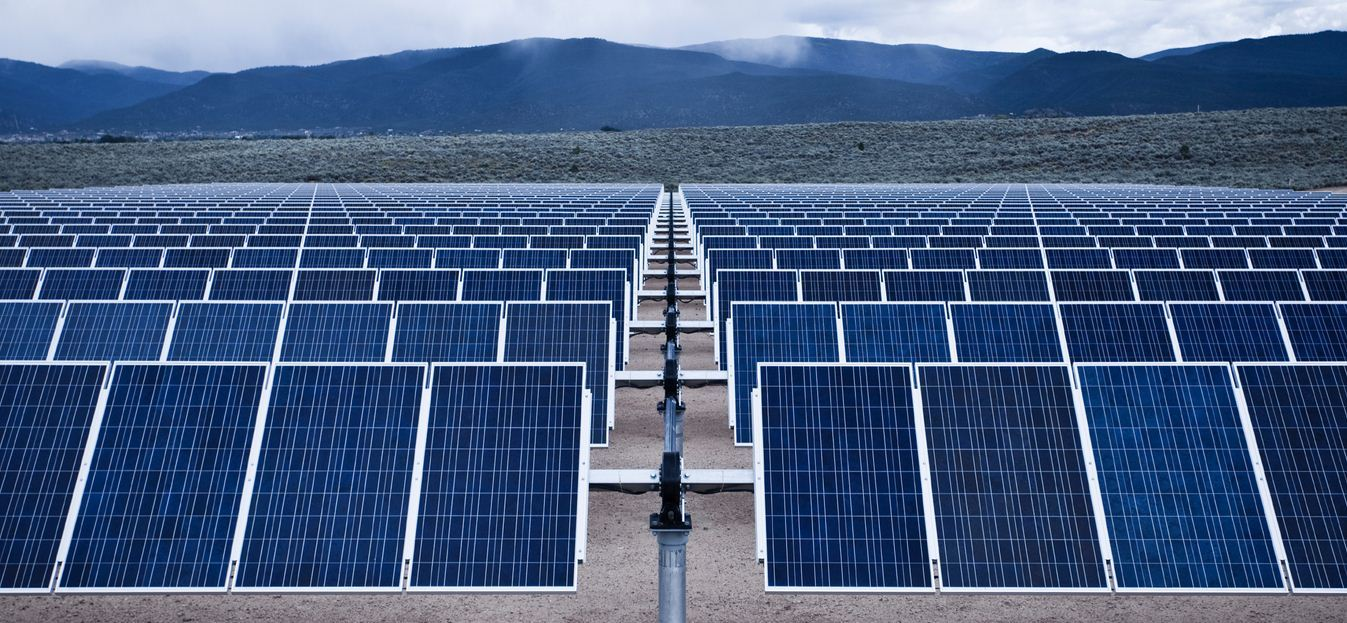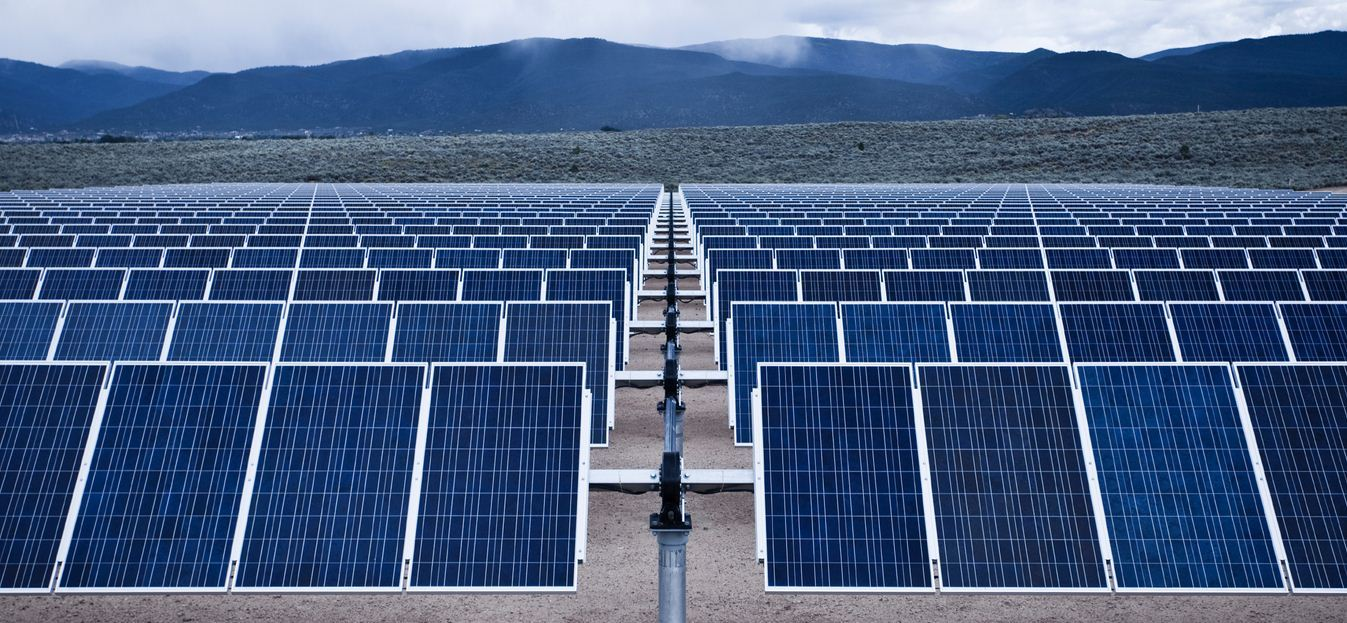


In [2]:
import numpy as np # To perform numerical operations
import pandas as pd # To do data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For advanced Data visualizations

In [3]:
#Loading the plant 1 generation and Weather Sensor Data
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [4]:
generation_data

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2            0.000    6987759.0  
3            0.000    7602960.0  
4            0.000    7158964.0  
...            ...          ...  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0  

[68778 rows x 7 columns]

In [8]:
# before merging the datasets we ne to convert date time format for proper time alignement

generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME']) # Parsing the date string in the format of Day/month/year
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])
weather_data.head()





DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [9]:
# Aggregating Generation Data
generation_agg = generation_data.groupby('DATE_TIME').agg({
    'DC_POWER':'sum', #calculating the sum of DC_Power
    'AC_POWER':'sum', #calculating the sum of AC_POWER
    'DAILY_YIELD' : 'mean', #calculating the average of DAILY_YEILD
    'TOTAL_YIELD' : 'mean' #calculating the average of TOTAL_YIELD
}).reset_index() # Used to control and manage the structure of a Dataframe's Index


In [10]:
generation_agg

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD
0    2020-05-15 00:00:00       0.0       0.0     0.000000  6.837223e+06
1    2020-05-15 00:15:00       0.0       0.0     0.000000  6.837223e+06
2    2020-05-15 00:30:00       0.0       0.0     0.000000  6.837223e+06
3    2020-05-15 00:45:00       0.0       0.0     0.000000  6.837223e+06
4    2020-05-15 01:00:00       0.0       0.0     0.000000  6.852802e+06
...                  ...       ...       ...          ...           ...
3153 2020-06-17 22:45:00       0.0       0.0  5889.590909  7.097398e+06
3154 2020-06-17 23:00:00       0.0       0.0  5889.590909  7.097398e+06
3155 2020-06-17 23:15:00       0.0       0.0  5889.590909  7.097398e+06
3156 2020-06-17 23:30:00       0.0       0.0  5889.590909  7.097398e+06
3157 2020-06-17 23:45:00       0.0       0.0  5816.489448  7.097398e+06

[3158 rows x 5 columns]

In [11]:
# aggregating Weather Sensor Data
weather_agg = weather_data.groupby('DATE_TIME').agg({
    'AMBIENT_TEMPERATURE' : 'mean', #calculating average AMBIENT_TEMPERATURE
    'MODULE_TEMPERATURE' : 'mean', #calculating average MODULE_TEMPERATURE
    'IRRADIATION' : 'mean' #calculating average IRRADIATION
}).reset_index()


In [12]:
Final_Data = pd.merge(generation_agg,weather_agg,on='DATE_TIME',how='inner') #how carries other values like outer, left and right

In [15]:
# Savind the Merged Dataset
Final_Data.to_csv('Plant1_Merged_Dataset.csv',index=False)


(array([1747.,  193.,  147.,  161.,  185.,  198.,  185.,  159.,  118.,
          64.]),
 array([     0.      ,  29893.778571,  59787.557142,  89681.335713,
        119575.114284, 149468.892855, 179362.671426, 209256.449997,
        239150.228568, 269044.007139, 298937.78571 ]),
 <BarContainer object of 10 artists>)

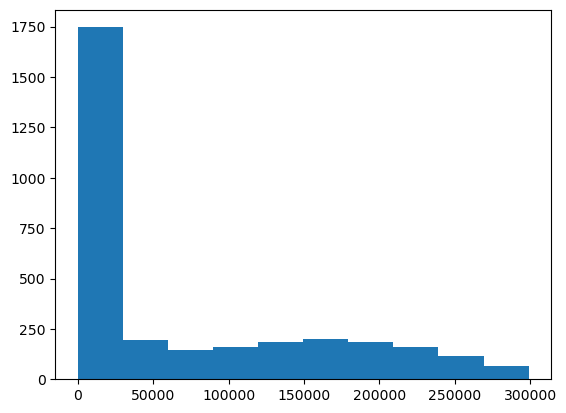

In [18]:
# exploring null values
Final_Data.isnull().sum()
plt.hist(Final_Data["DC_POWER"])

In [19]:
# exploring null values
Final_Data.isnull().sum()
daytime_data = Final_Data[Final_Data['IRRADIATION']>0] # filtering only the day time data by setting Irridation > 0
numeric_columns = daytime_data.select_dtypes(include=['float64', 'int64']).columns # selecting only numeric columns from the dataframe

In [20]:
sns.set(style="whitegrid")

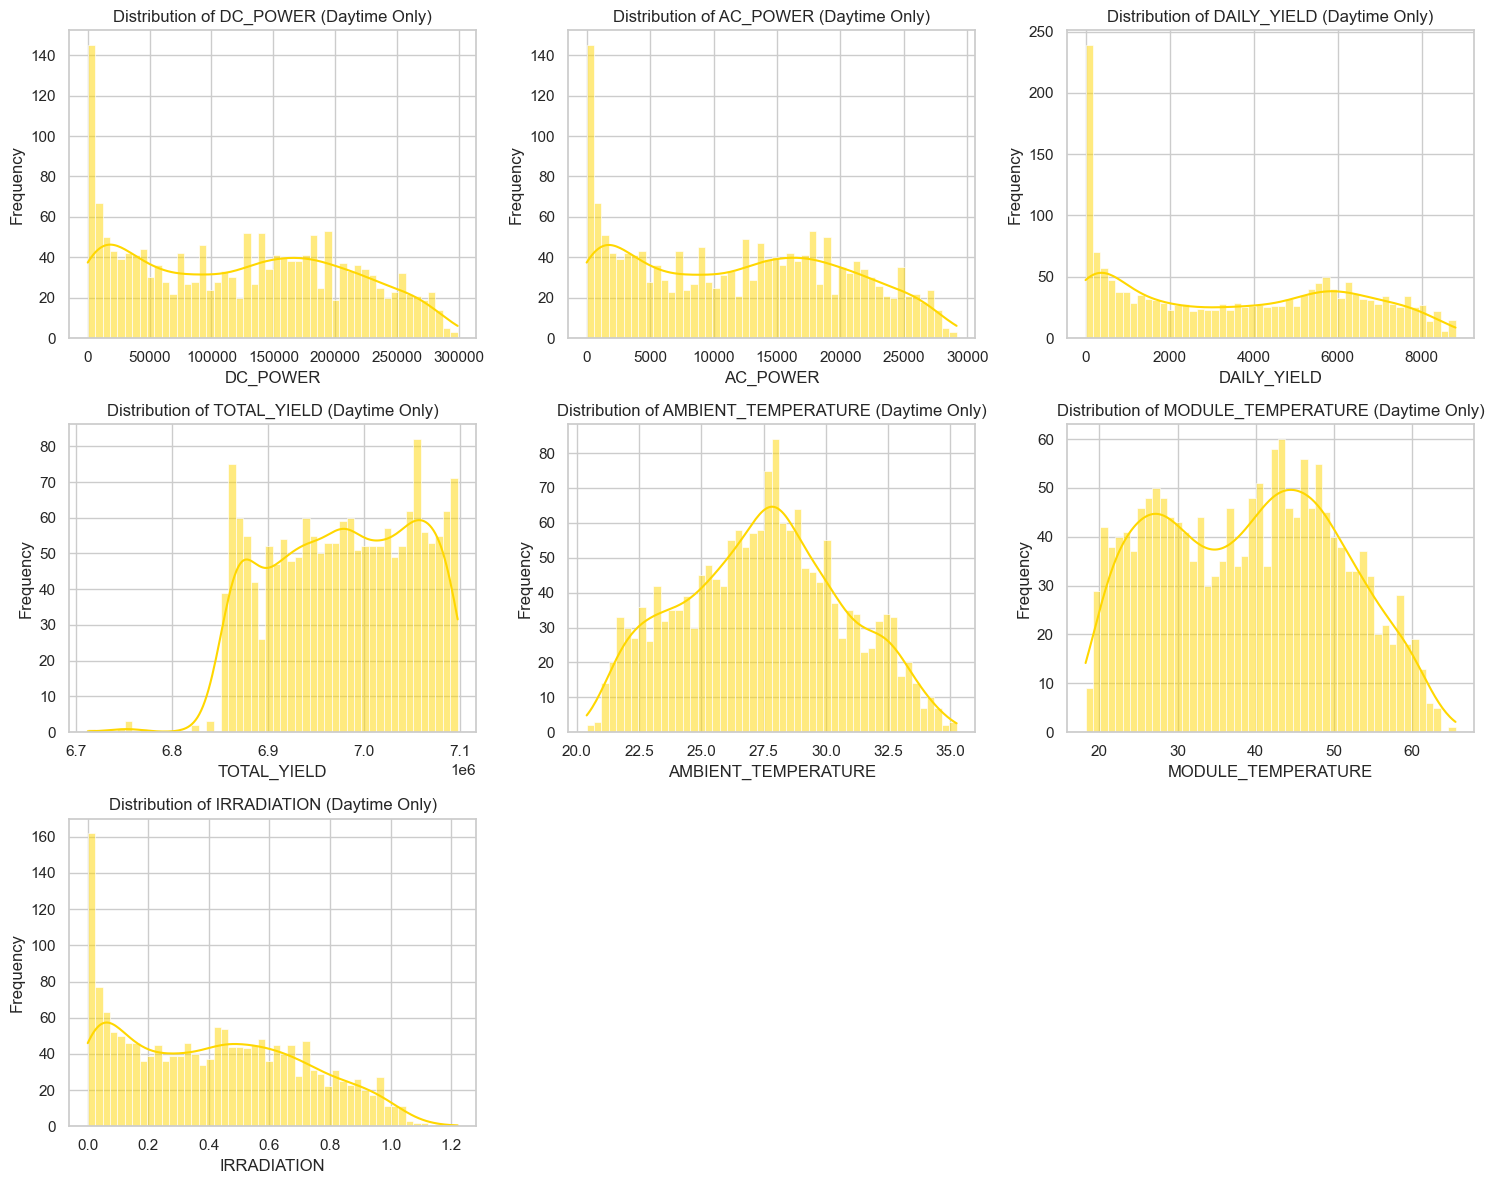

In [21]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(daytime_data[col], kde=True, bins=50, color='gold')
    plt.title(f'Distribution of {col} (Daytime Only)')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [23]:
## #**A short summary From the above Feature Distribution**
#* **DC_POWER & AC_POWER** : Both show right-skewed distributions, indicating most readings are at lower power levels with fewer high-output instances.
#* **DAILY_YEILD** : Right-skewed distribution suggests many days with lower energy production, potentially due to shorter daylight hours or cloudy weather conditions.
#* **TOTAL_YEILD** : Displays a narrow range with a nearly uniform spread.
#* **AMBIENT_TEMPERATURE** : Approximately normal distribution centered around 27–28°C.
#* **MODULE_TEMPERATURE** : Bimodal distribution shows distinct heating patterns
#* **IRRADIATION** : Strongly right-skewed, with a high frequency of low values.


In [24]:
# Set DATE_TIME as the index
Final_Data.set_index('DATE_TIME', inplace=True)
Final_Data.sort_index(inplace=True)


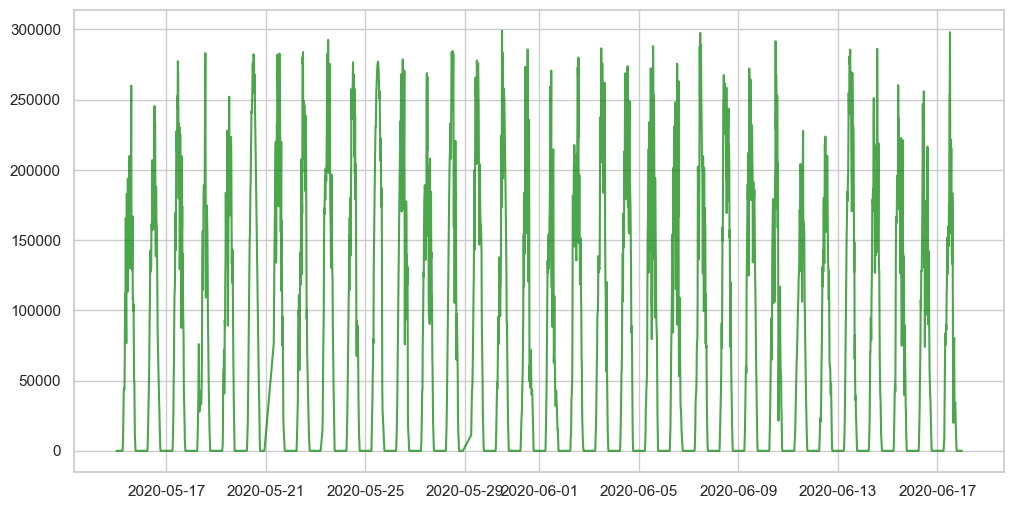

In [25]:
# Plot DC_POWER time series
plt.figure(figsize=(12, 6))
plt.plot(Final_Data.index, Final_Data['DC_POWER'], color="green", alpha=0.7, label="DC_POWER")


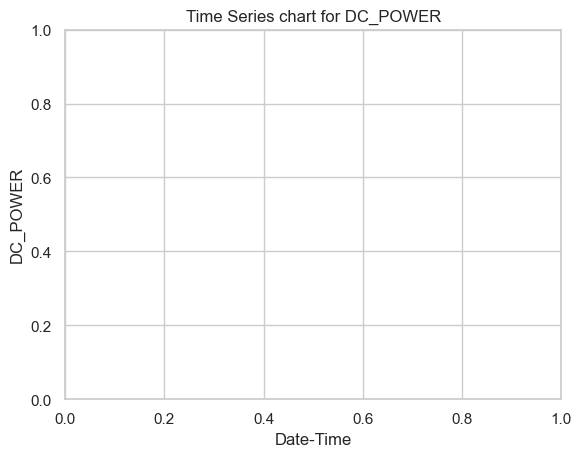

In [27]:
plt.title("Time Series chart for DC_POWER")
plt.xlabel("Date-Time")
plt.ylabel("DC_POWER")
#plt.legend()
plt.show()


In [28]:
correlation_matrix = Final_Data.corr(numeric_only = True) # calculating the pairwise correlation b/w all numerical columns
correlation_matrix


DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DC_POWER             1.000000  0.999997     0.075897    -0.009787   
AC_POWER             0.999997  1.000000     0.075839    -0.009706   
DAILY_YIELD          0.075897  0.075839     1.000000     0.019176   
TOTAL_YIELD         -0.009787 -0.009706     0.019176     1.000000   
AMBIENT_TEMPERATURE  0.725679  0.725879     0.491900    -0.202452   
MODULE_TEMPERATURE   0.960939  0.961011     0.198208    -0.076345   
IRRADIATION          0.995957  0.995864     0.073364    -0.017062   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DC_POWER                        0.725679            0.960939     0.995957  
AC_POWER                        0.725879            0.961011     0.995864  
DAILY_YIELD                     0.491900            0.198208     0.073364  
TOTAL_YIELD                    -0.202452           -0.076345    -0.017062  
AMBIENT_TEMPERATURE             1.000000            0.853162     0.721839  
MODULE_TEMPERATURE              0.853162            1.000000     0.961422  
IRRADIATION                     0.721839            0.961422     1.000000

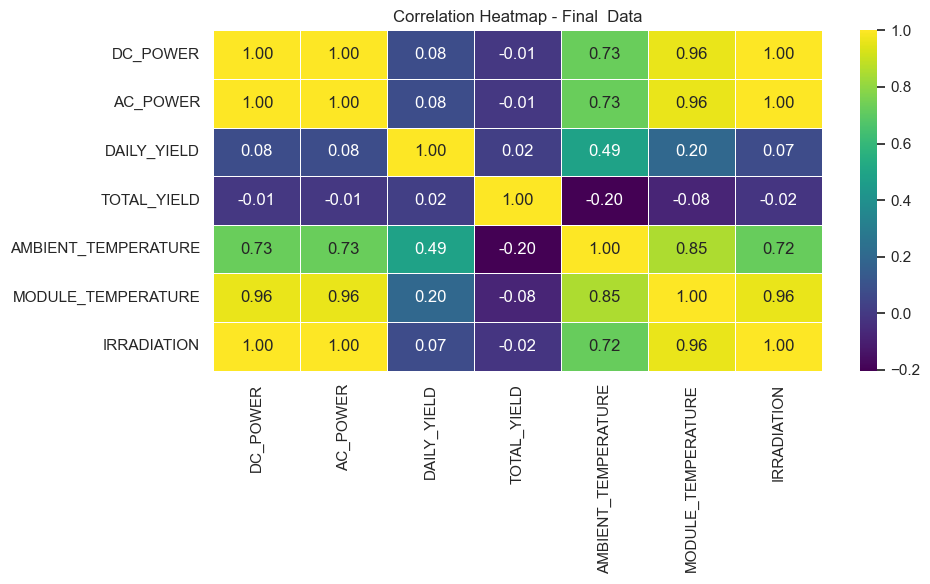

In [29]:
plt.figure(figsize=(10, 6)) # sets the figure size as 10 inches width and 6 inches tall
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5) 
plt.title("Correlation Heatmap - Final  Data")
plt.tight_layout() # used to prevent the overlapping in the figure area
plt.show() # used to visualize the figure


In [ ]:
#“From the above correlation heatmap we can clearly understand that the high correlations near 1+ shows that irradiation is the dominant factor
#driving power production and module temperature. The Moderate positive correlations around 0.5 to 0.8 shows more energy produced on sunny days based on the  AMBIENT_TEMPERATURE with DC_POWER / AC_POWER and DAILY_YIELD. The weak (0) or negative (-) values shows no correlation and it's not statistically meaningful.”


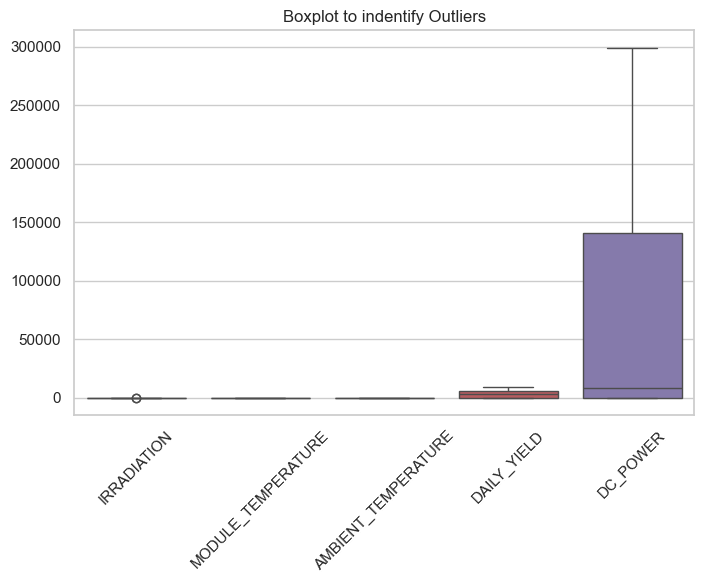

In [30]:
# Using these features to visualize the box plot to identify the outliers in a dataframe
Features = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'DAILY_YIELD',
    'DC_POWER'
]
plt.figure(figsize=(8, 5))
sns.boxplot(data=Final_Data[Features])
plt.title("Boxplot to indentify Outliers")
plt.xticks(rotation=45)
plt.show()


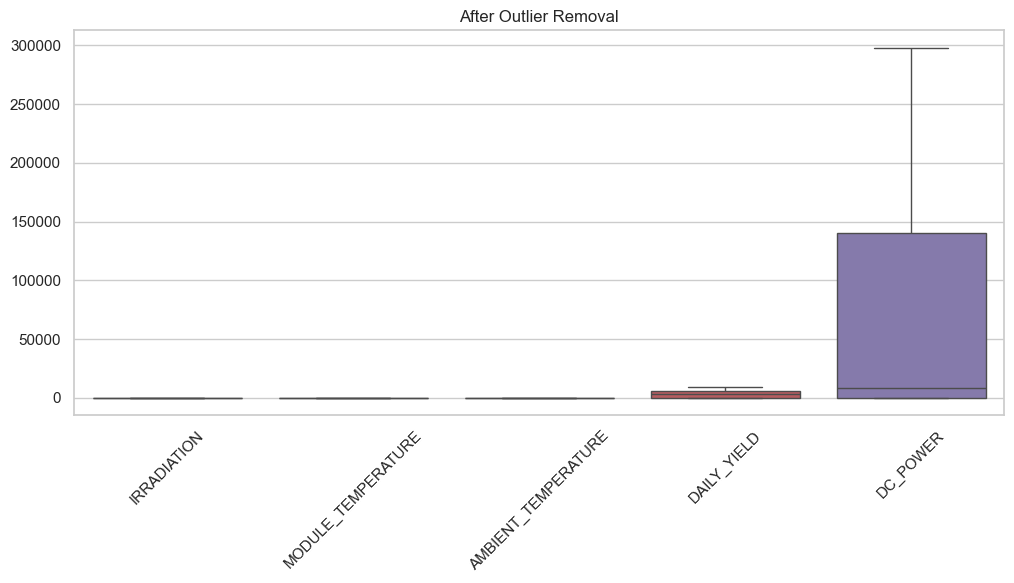

In [32]:
# creating a copy to avoid the changes in original data
Data_Clean = Final_Data.copy()


#applying IQR method to remove the outliers
for col in Features:
    Q1 = Data_Clean[col].quantile(0.25)
    Q3 = Data_Clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Data_Clean = Data_Clean[(Data_Clean[col] >= lower_bound) & (Data_Clean[col] <= upper_bound)]


#Visualizing the box plot after removing the outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=Data_Clean[Features])
plt.title("After Outlier Removal")
plt.xticks(rotation=45)
plt.show()
